In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan")
from ripser import Ripser
from kernels import alpha_decaying_kernel
from functions import diffusion_map, make_diffusion, visuallize_diffusion_map, petals, spiral, swiss_roll_hole

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

def calculate_lawvere_homology_logp(P):
    # in the code it is 
    # A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    A = - np.log(P)
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return points

def calculate_lawvere_homology_diffu_dist(P, t=1):
    # in the code it is 
    # A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    lam, phi = diffusion_map(P)
    Xd = lam ** t * phi
    A = euclidean_distances(Xd)
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return points

def calculate_lawvere_homology_pecan(X, epsilon, alpha=2, t=1):
    K = alpha_decaying_kernel(X, alpha=alpha, epsilon=epsilon)
    d = K.sum(axis=1)
    # A = np.diag(np.sqrt(1/d)) @ (1 - K) @ np.diag(np.sqrt(1/d)) # why? also, inconsistent w/ in code wrt normalization.
    # in the code it is 
    A = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return points

In [3]:
from sklearn.decomposition import PCA

def visualize_diffusion_map_subplot(X, P, t, ax, name='petals', epsilon=1.):
    lam, Xd = diffusion_map(P)  # Assuming diffusion_map is a function you've defined
    Xd = lam * Xd
    pca = PCA(n_components=2, random_state=42)
    Xpca = pca.fit_transform(Xd)
    ax.scatter(Xpca[:, 0], Xpca[:, 1])
    ax.set_title(f"{name}, $t$={t}, $\epsilon$={epsilon}")

def visualize_lawvere_homology(points, ax, epsilon=1., name=''):
    ax.set_xlim(points[:, :-1].min() * 0.9, points[:, :-1].max() * 1.1)
    ax.set_ylim(points[:, :-1].min() * 0.9, points[:, :-1].max() * 1.1)
    ax.axline((-0.1, -0.1), slope=1.0, c='k')
    ax.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2], cmap='coolwarm')
    ax.set_title(f"Lawvere Homology with {name}")

In [4]:
def plot_logp(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='diffusion map (PCA)', epsilon=epsilon)

    # Second subplot: scatter plot
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    plt.tight_layout()
    plt.show()

def plot_diffu_dist(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Second subplot: scatter plot
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='diffusion distance')

    plt.tight_layout()
    plt.show()

def plot_both(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[2], epsilon=epsilon, name='diffusion distance')

    plt.tight_layout()
    plt.show()

def plot_three(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[2], epsilon=epsilon, name='diffusion distance')

    points = calculate_lawvere_homology_pecan(X, epsilon=epsilon, alpha=2, t=t)
    visualize_lawvere_homology(points, axs[3], epsilon=epsilon, name='old PECAN')

    plt.tight_layout()
    plt.show()



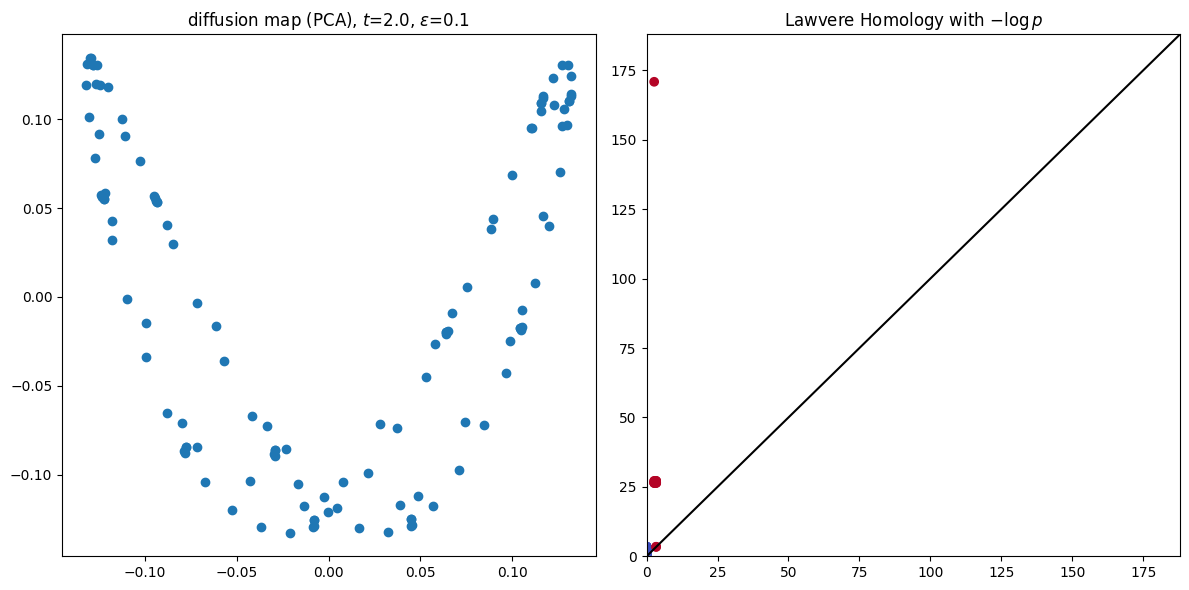

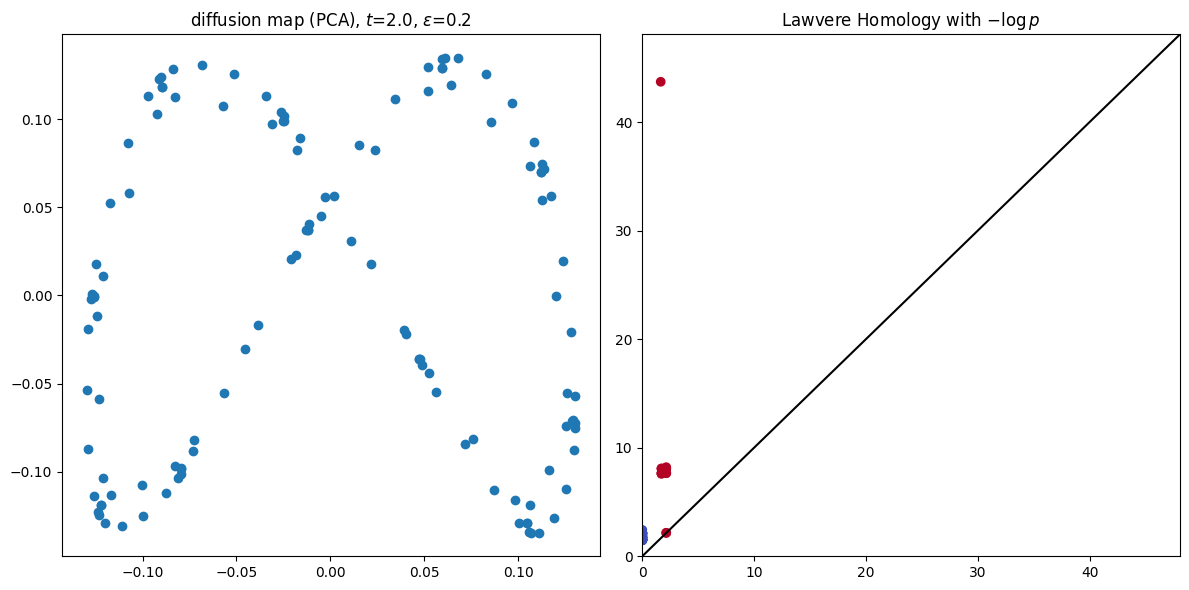

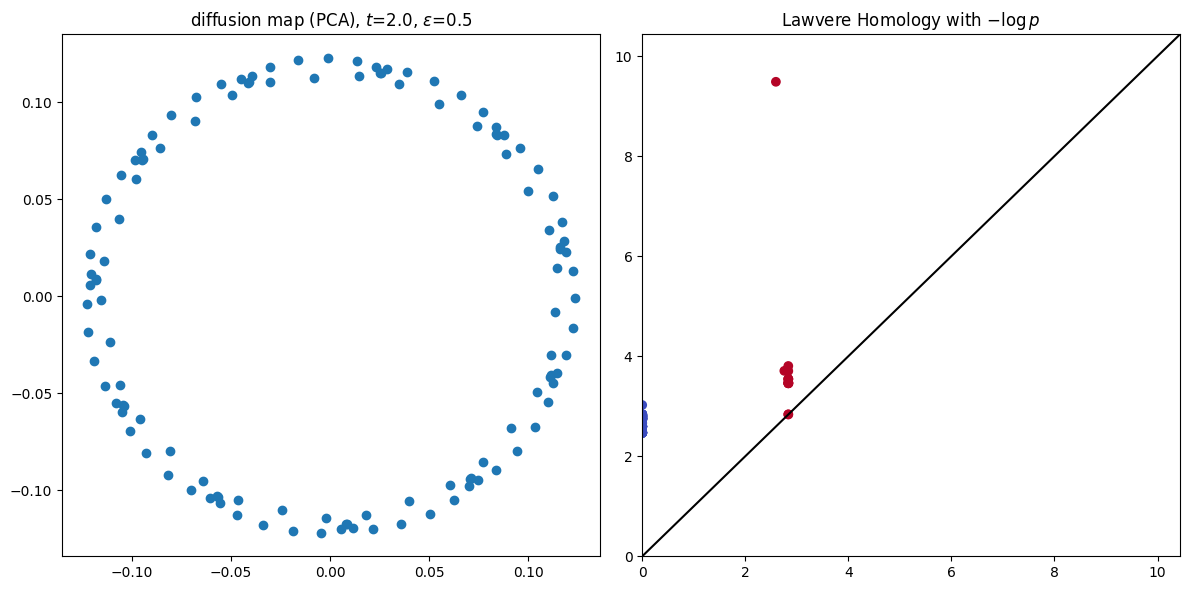

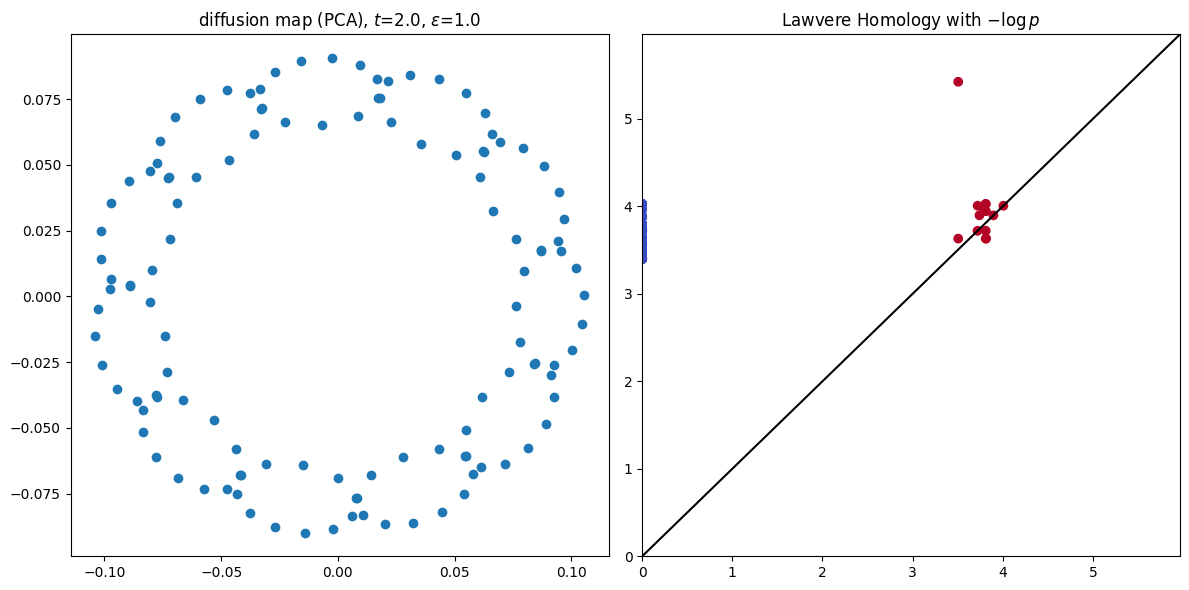

In [5]:
plot_logp(0.1)
plot_logp(0.2)
plot_logp(0.5)
plot_logp(1.)

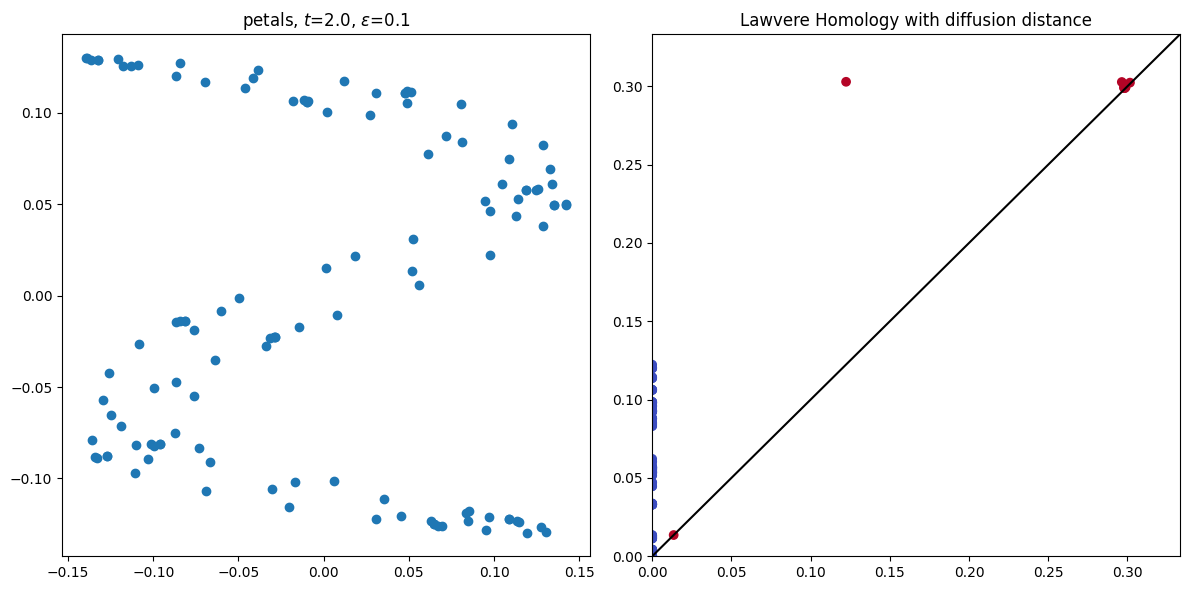

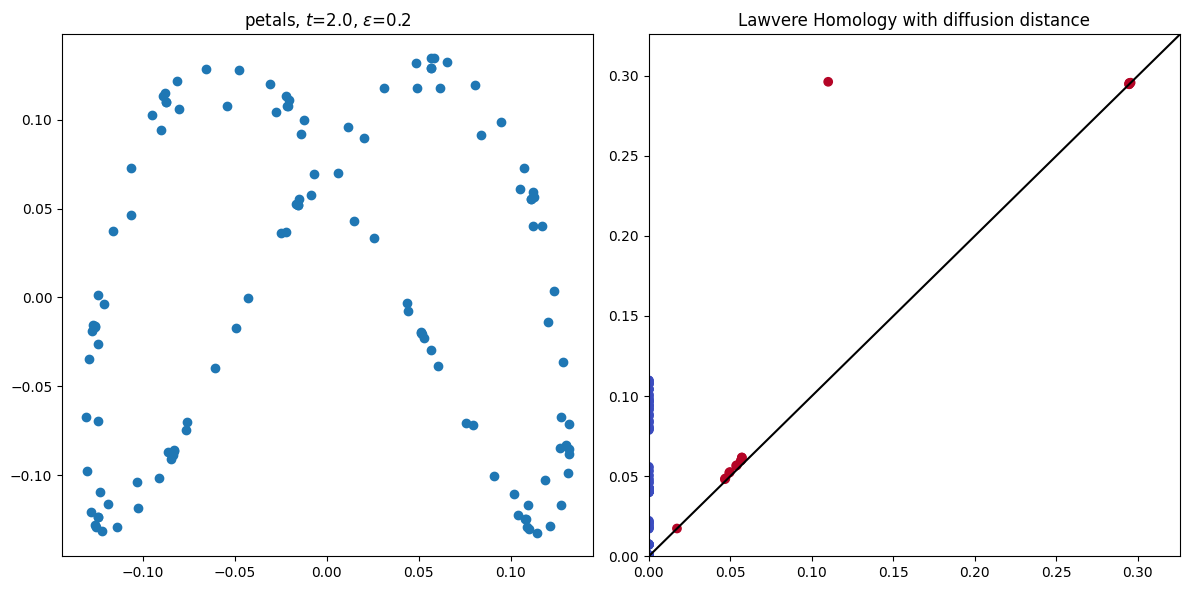

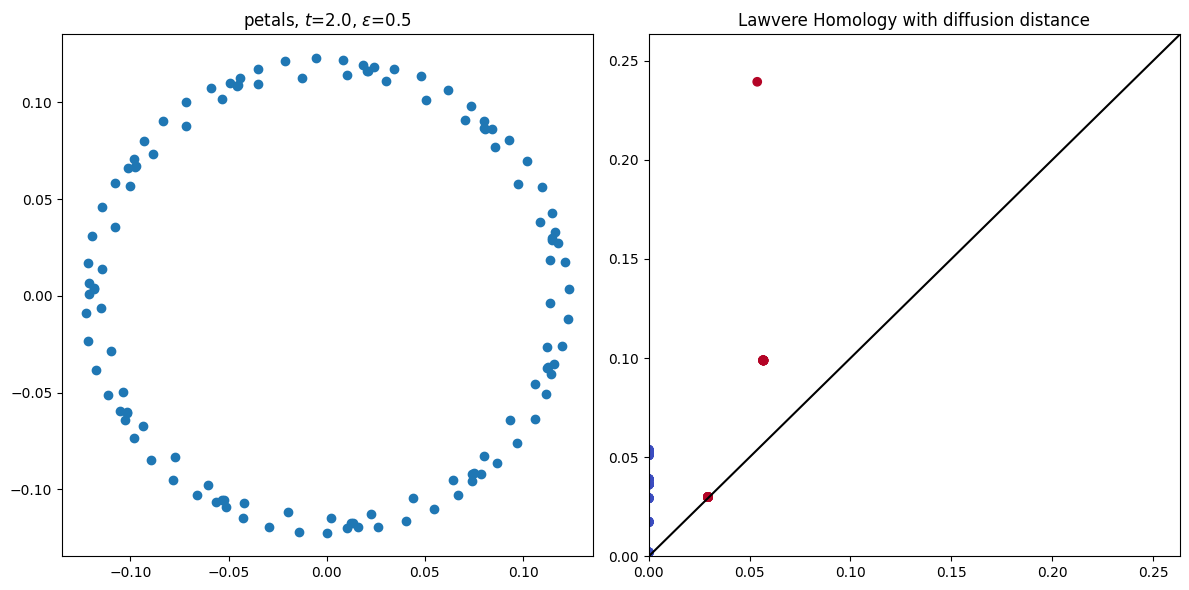

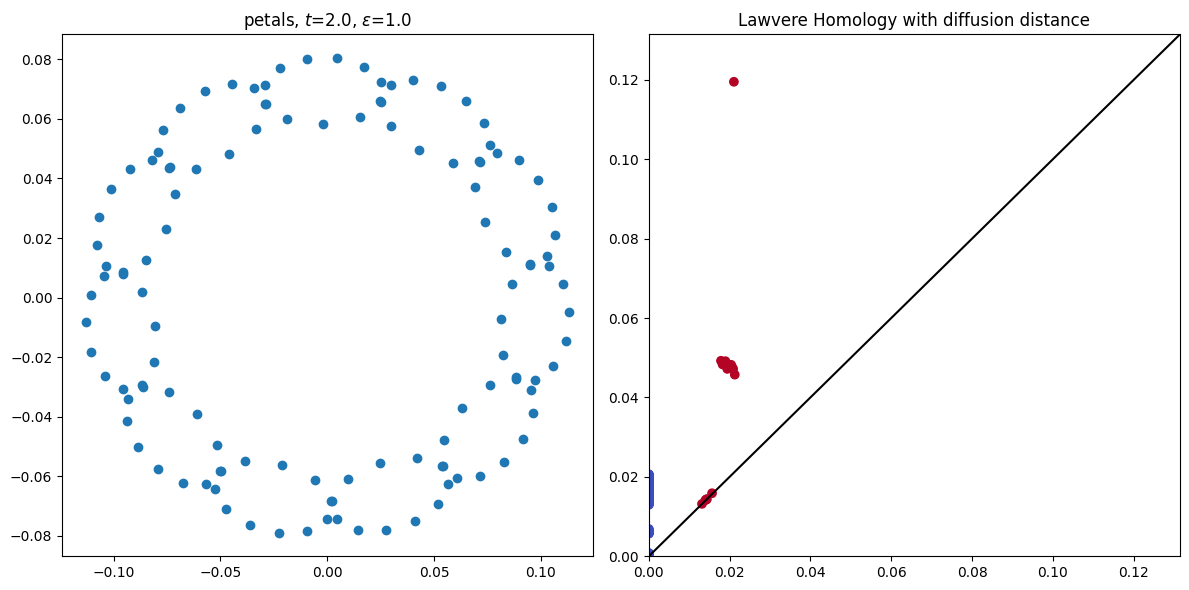

ValueError: Some elements in the array are not real within the specified tolerance.

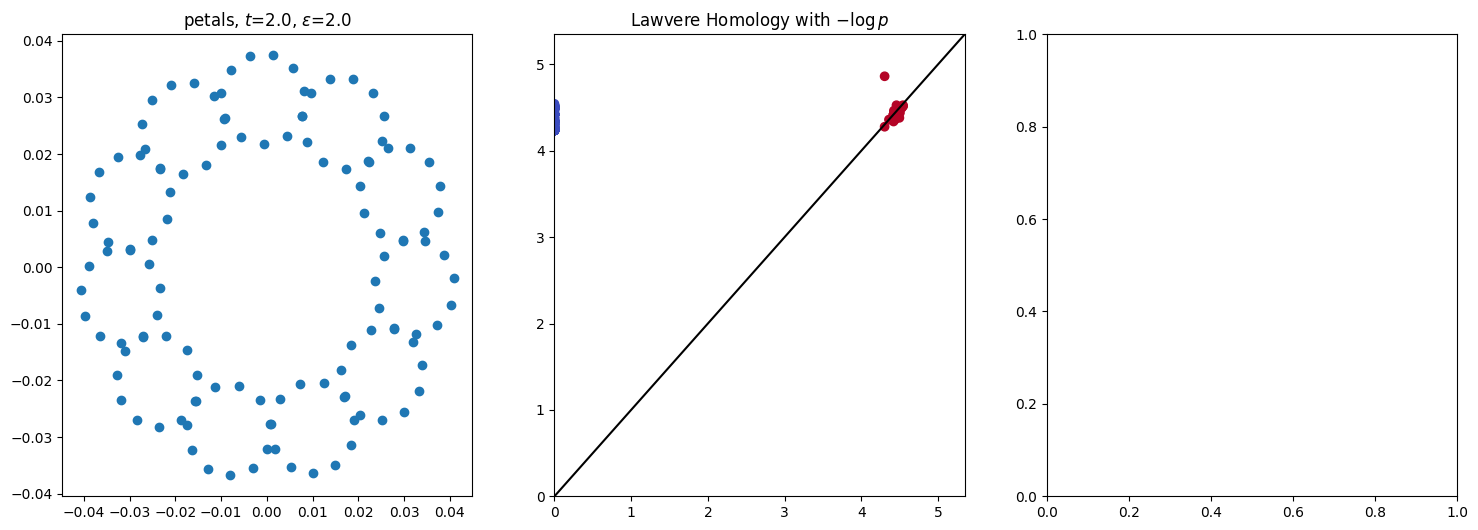

In [6]:
plot_diffu_dist(0.1)
plot_diffu_dist(0.2)
plot_diffu_dist(0.5)
plot_diffu_dist(1.)
plot_both(2.)

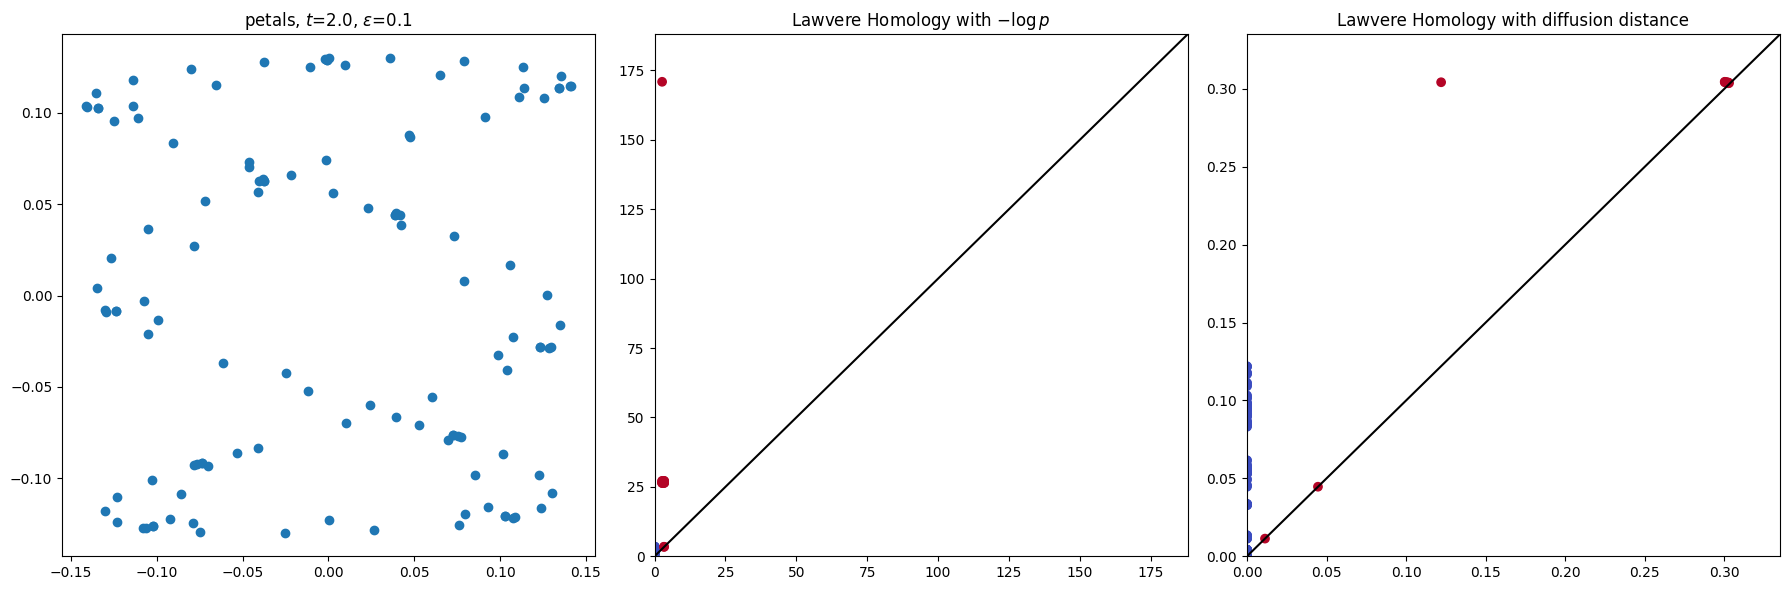

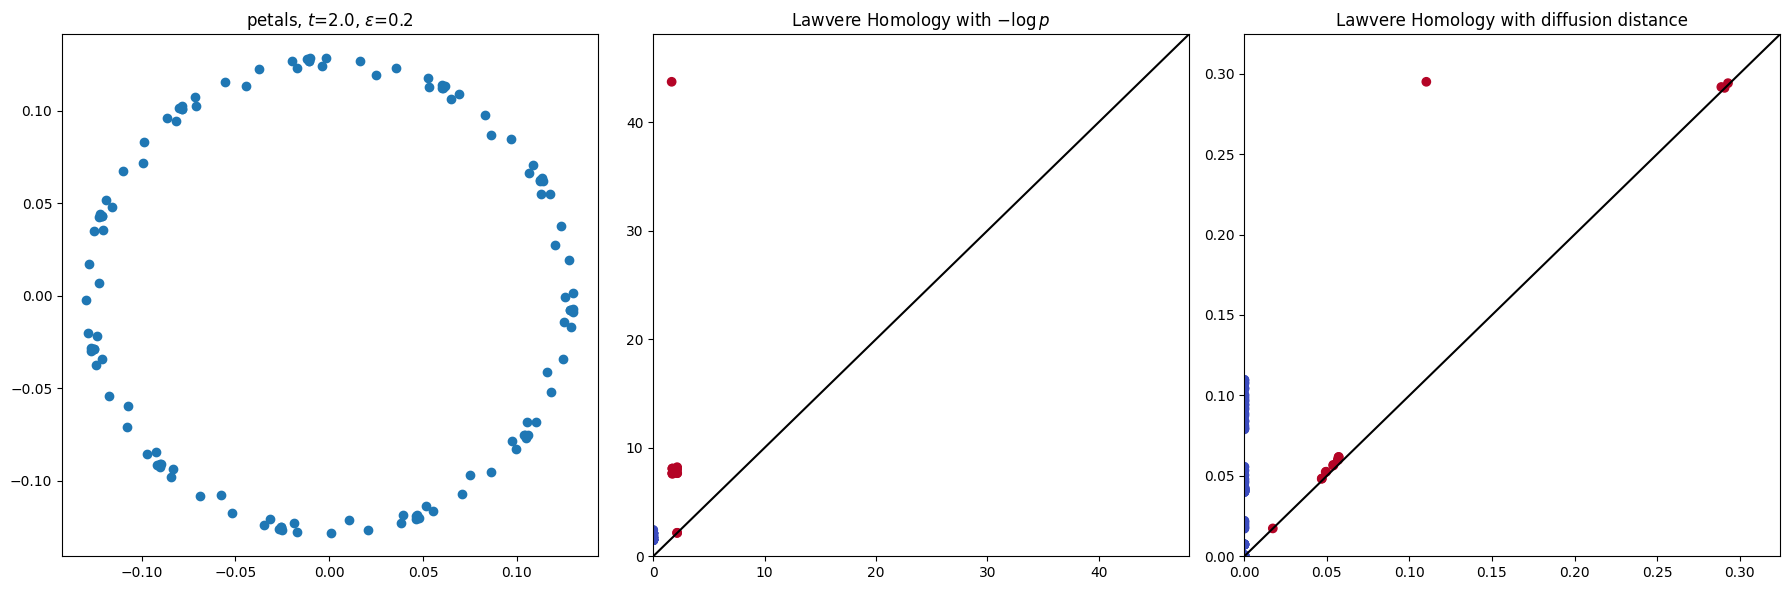

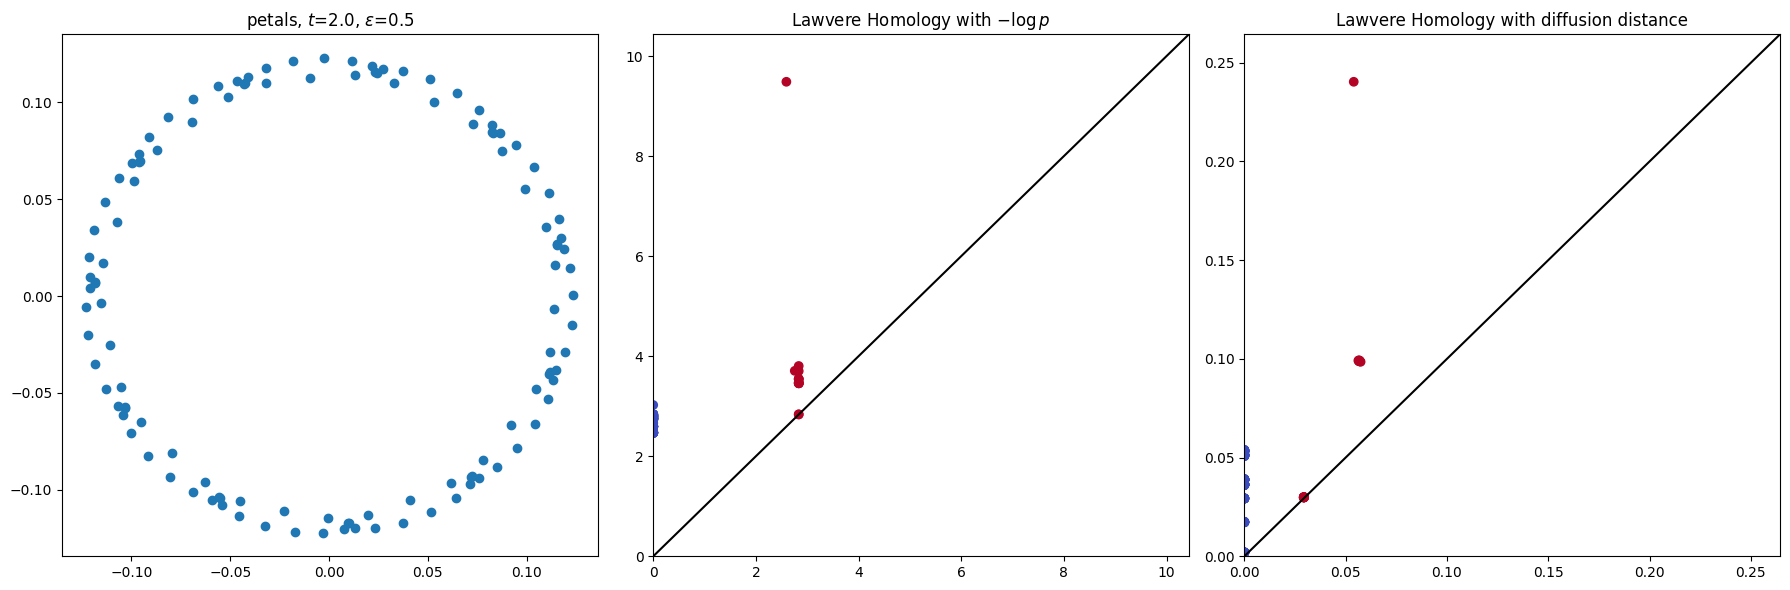

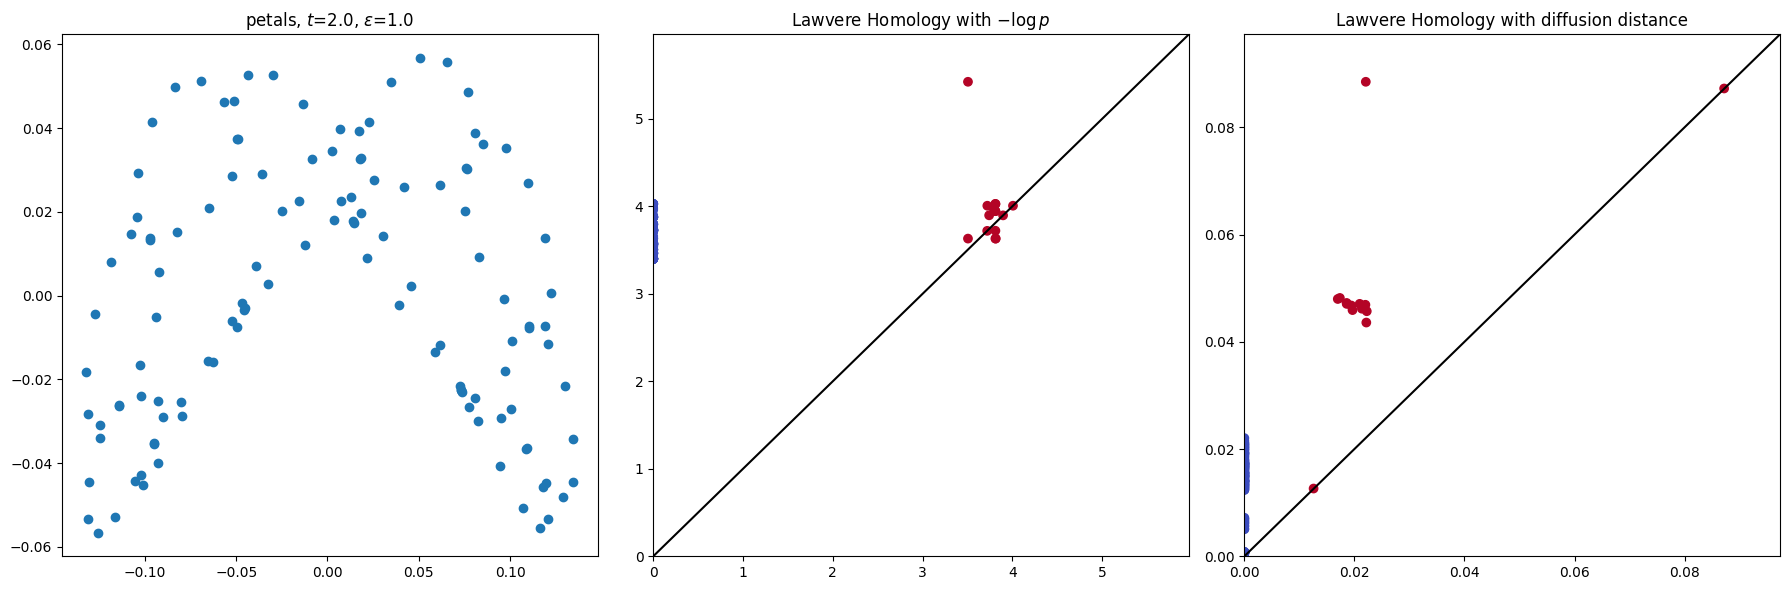

In [ ]:
plot_both(0.1)
plot_both(0.2)
plot_both(0.5)
plot_both(1.)

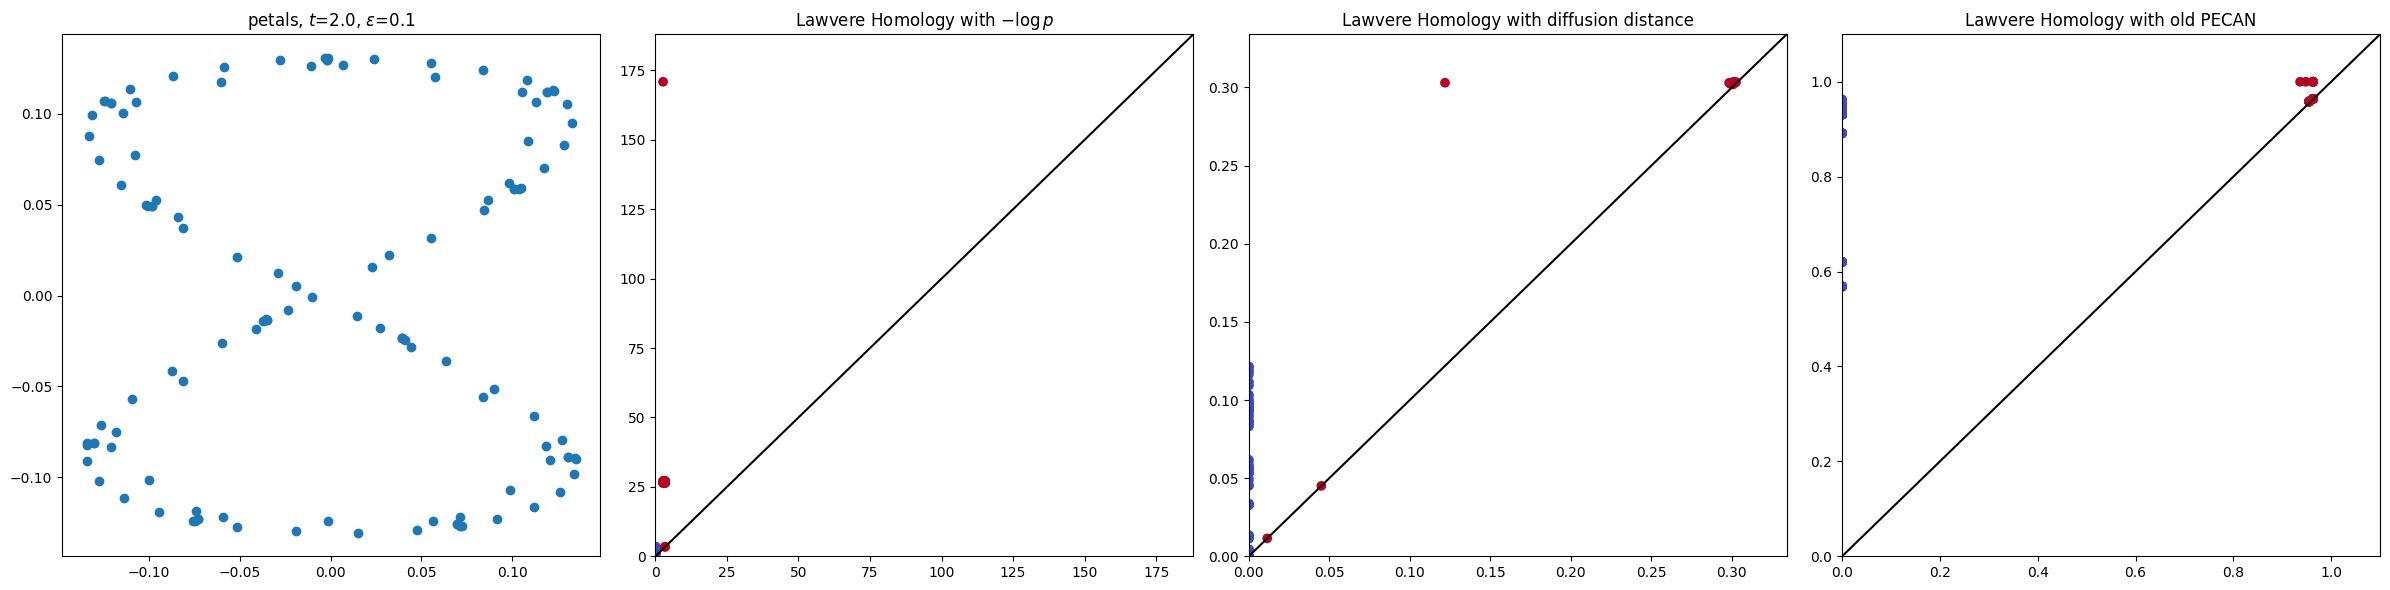

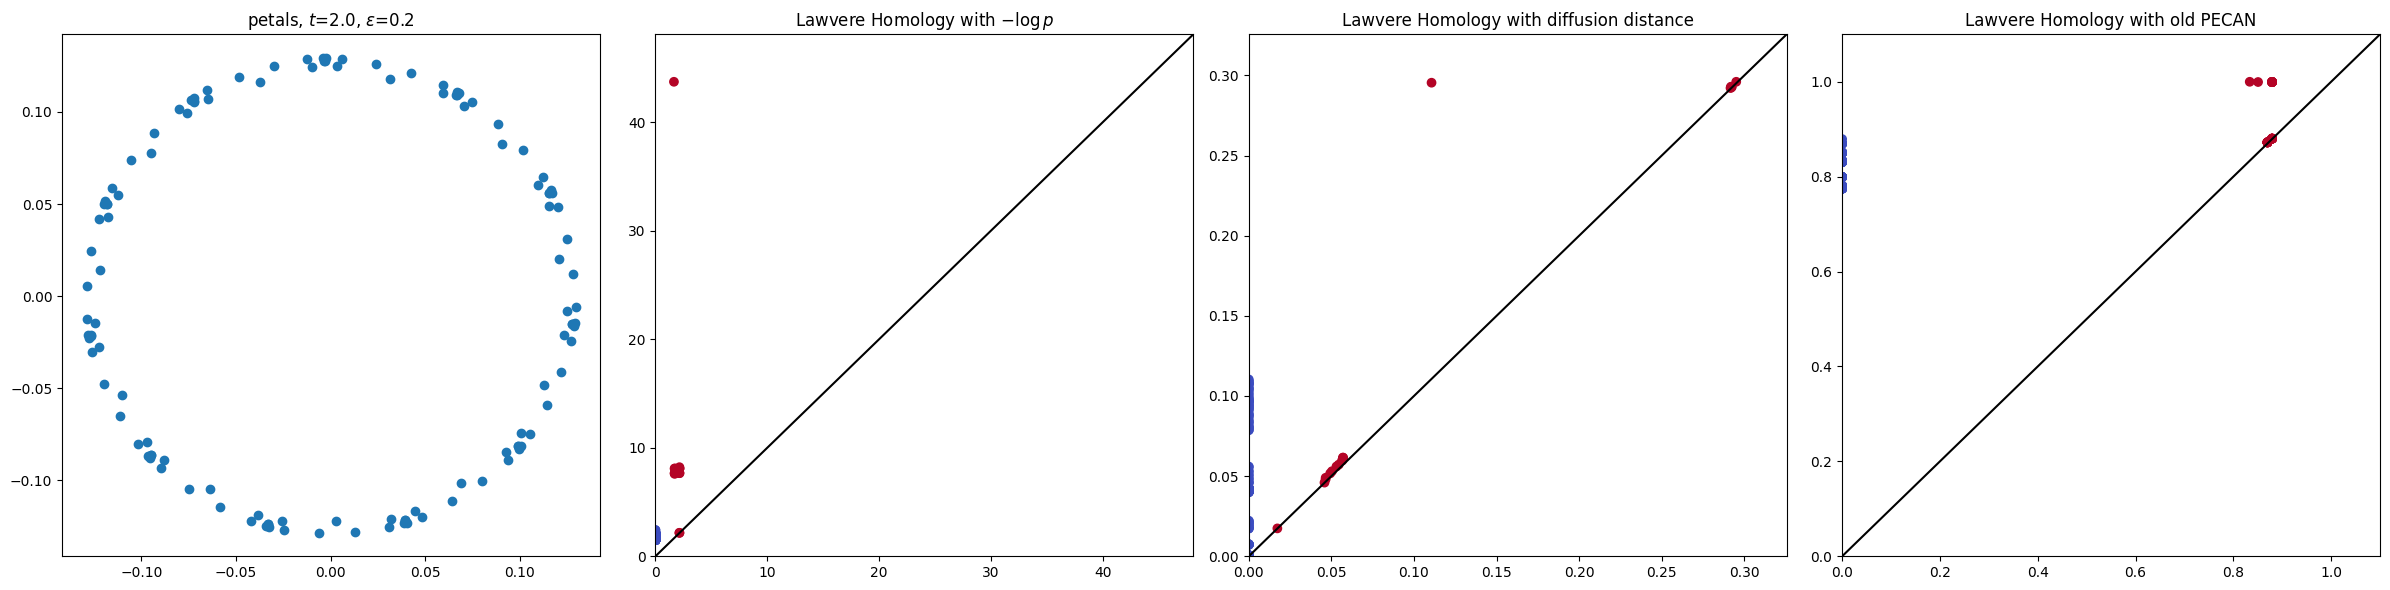

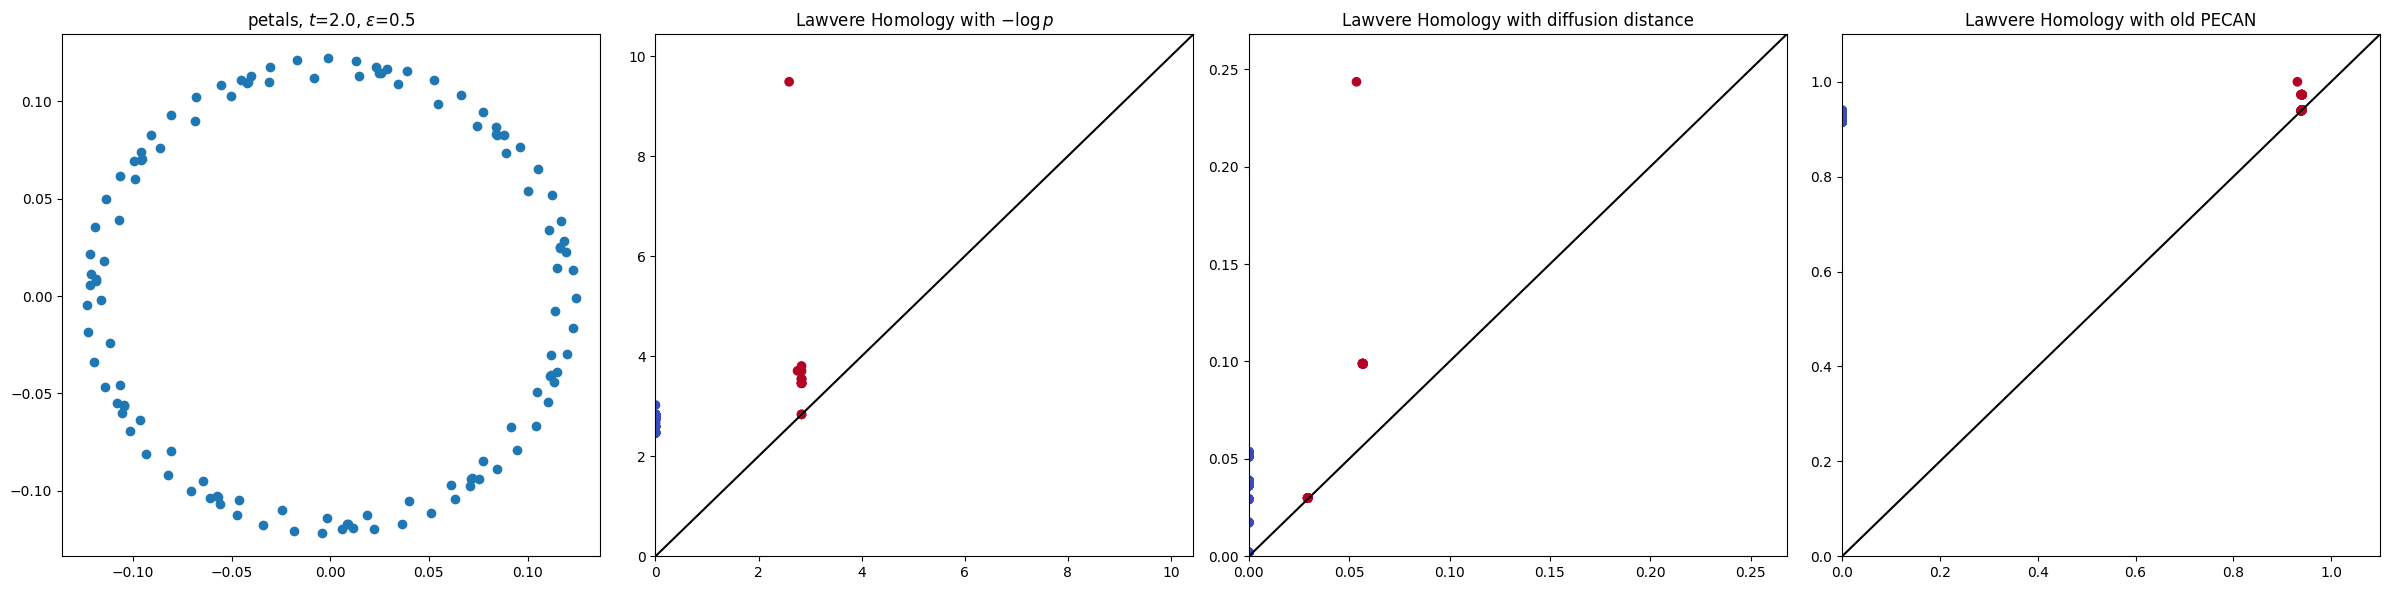

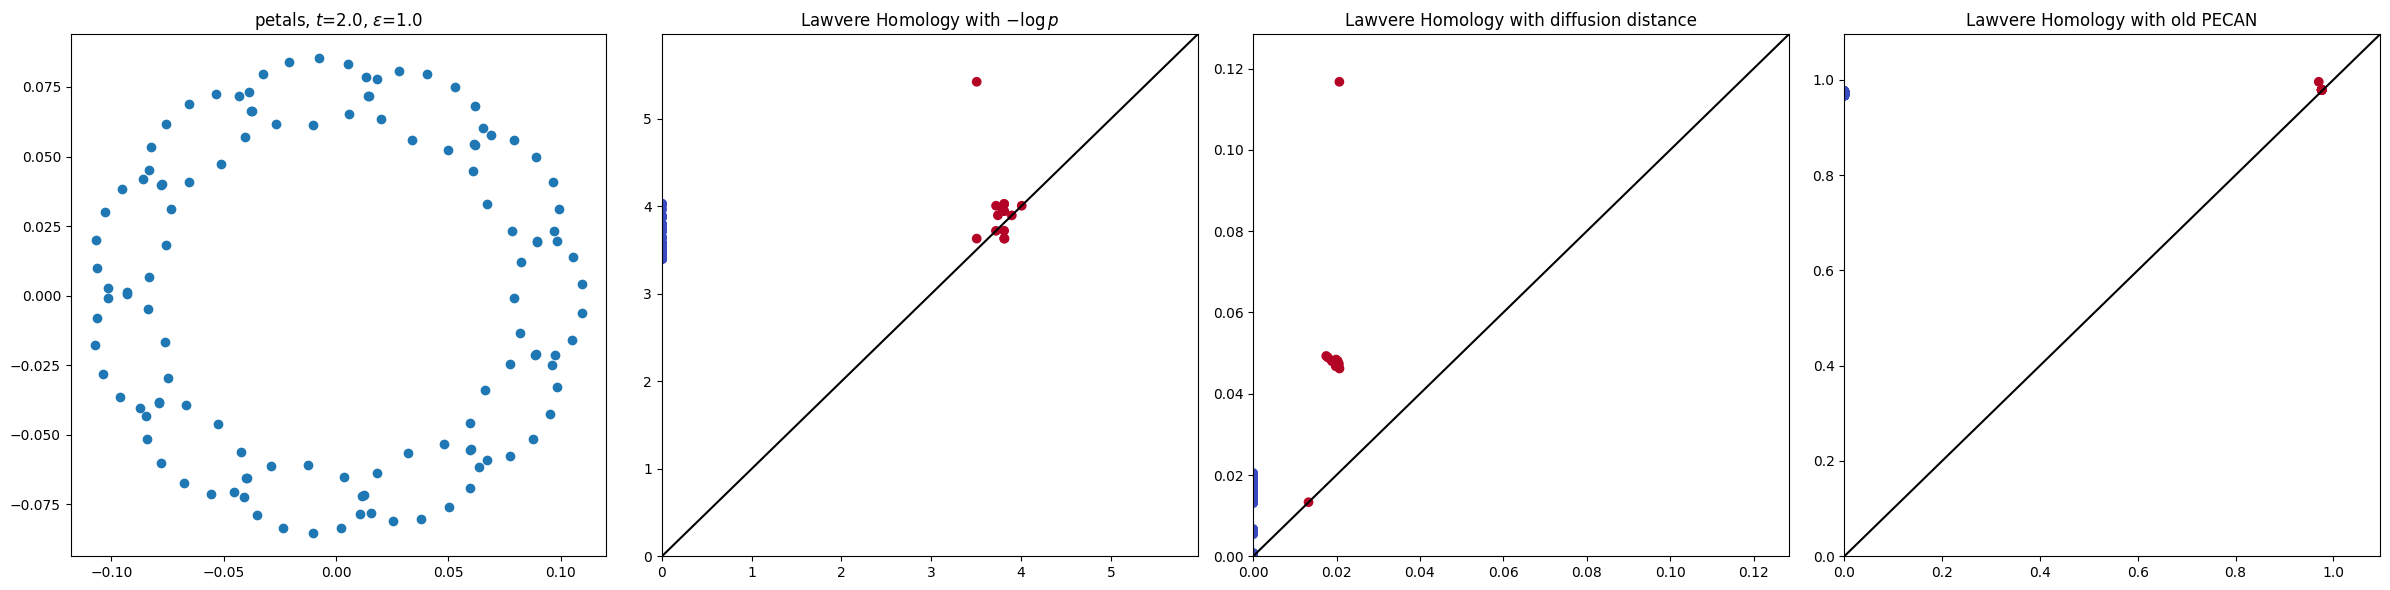

In [ ]:
plot_three(0.1)
plot_three(0.2)
plot_three(0.5)
plot_three(1.)

In [7]:
def plot_three_dataset(epsilon, dataset):
    t = 2.
    X, _ = dataset(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[2], epsilon=epsilon, name='diffusion distance')

    points = calculate_lawvere_homology_pecan(X, epsilon=epsilon, alpha=2, t=t)
    visualize_lawvere_homology(points, axs[3], epsilon=epsilon, name='old PECAN')

    plt.tight_layout()
    plt.show()

def plot_four_dataset(epsilon, dataset):
    t = 2.
    X, _ = dataset(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 5, figsize=(30, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[2], epsilon=epsilon, name='diffusion distance')

    points = calculate_lawvere_homology_pecan(X, epsilon=epsilon, alpha=2, t=t)
    visualize_lawvere_homology(points, axs[3], epsilon=epsilon, name='old PECAN')



    plt.tight_layout()
    plt.show()


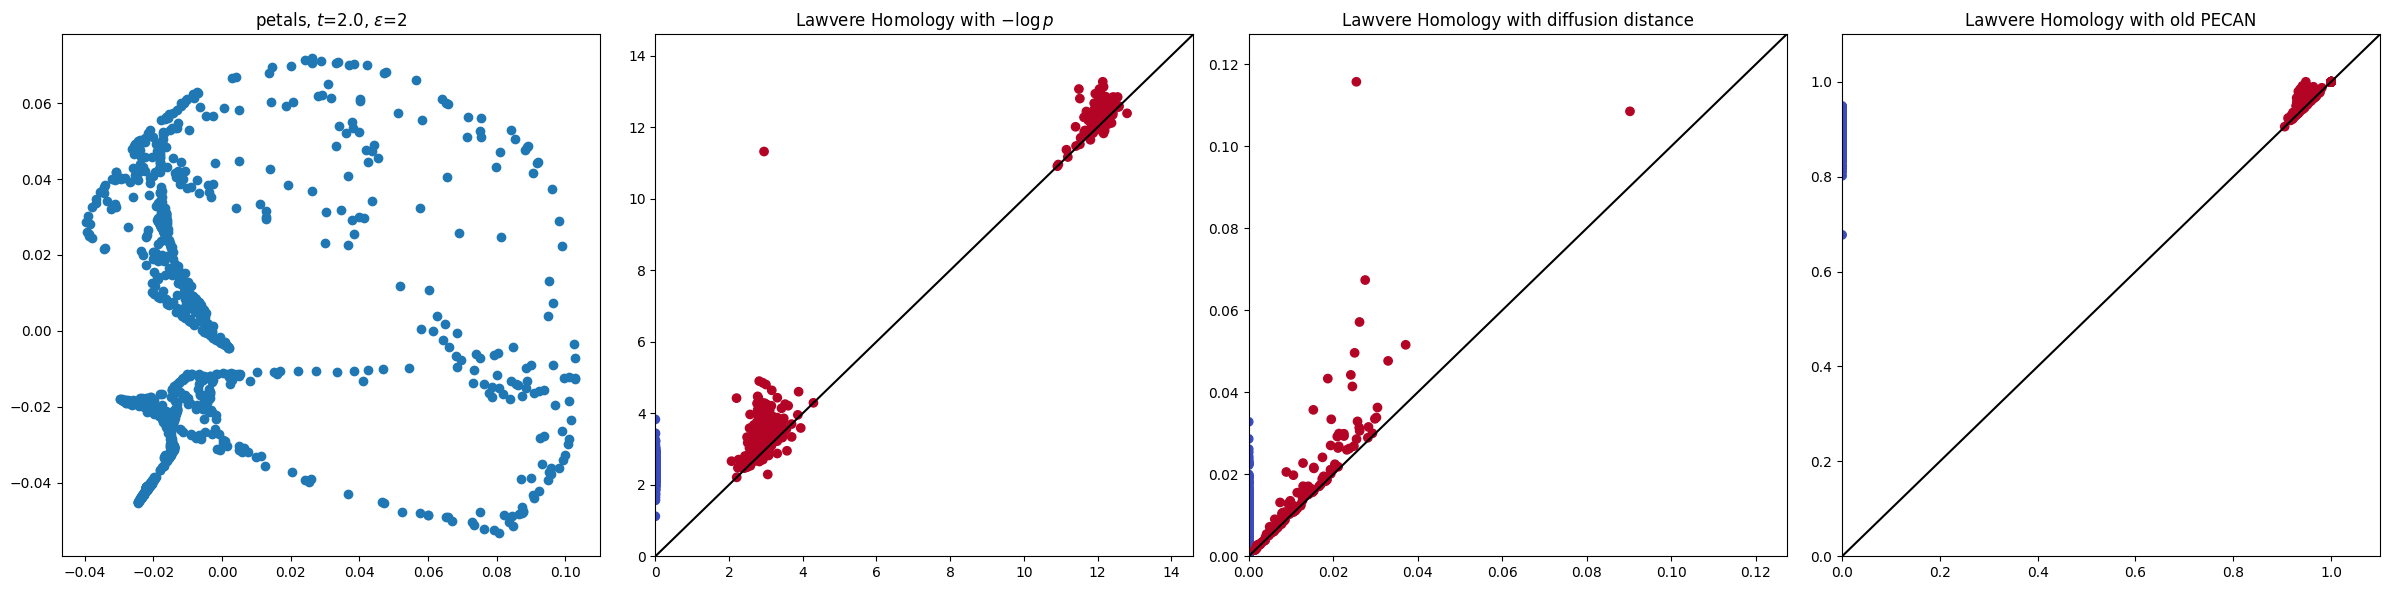

In [14]:
plot_three_dataset(2, swiss_roll_hole)

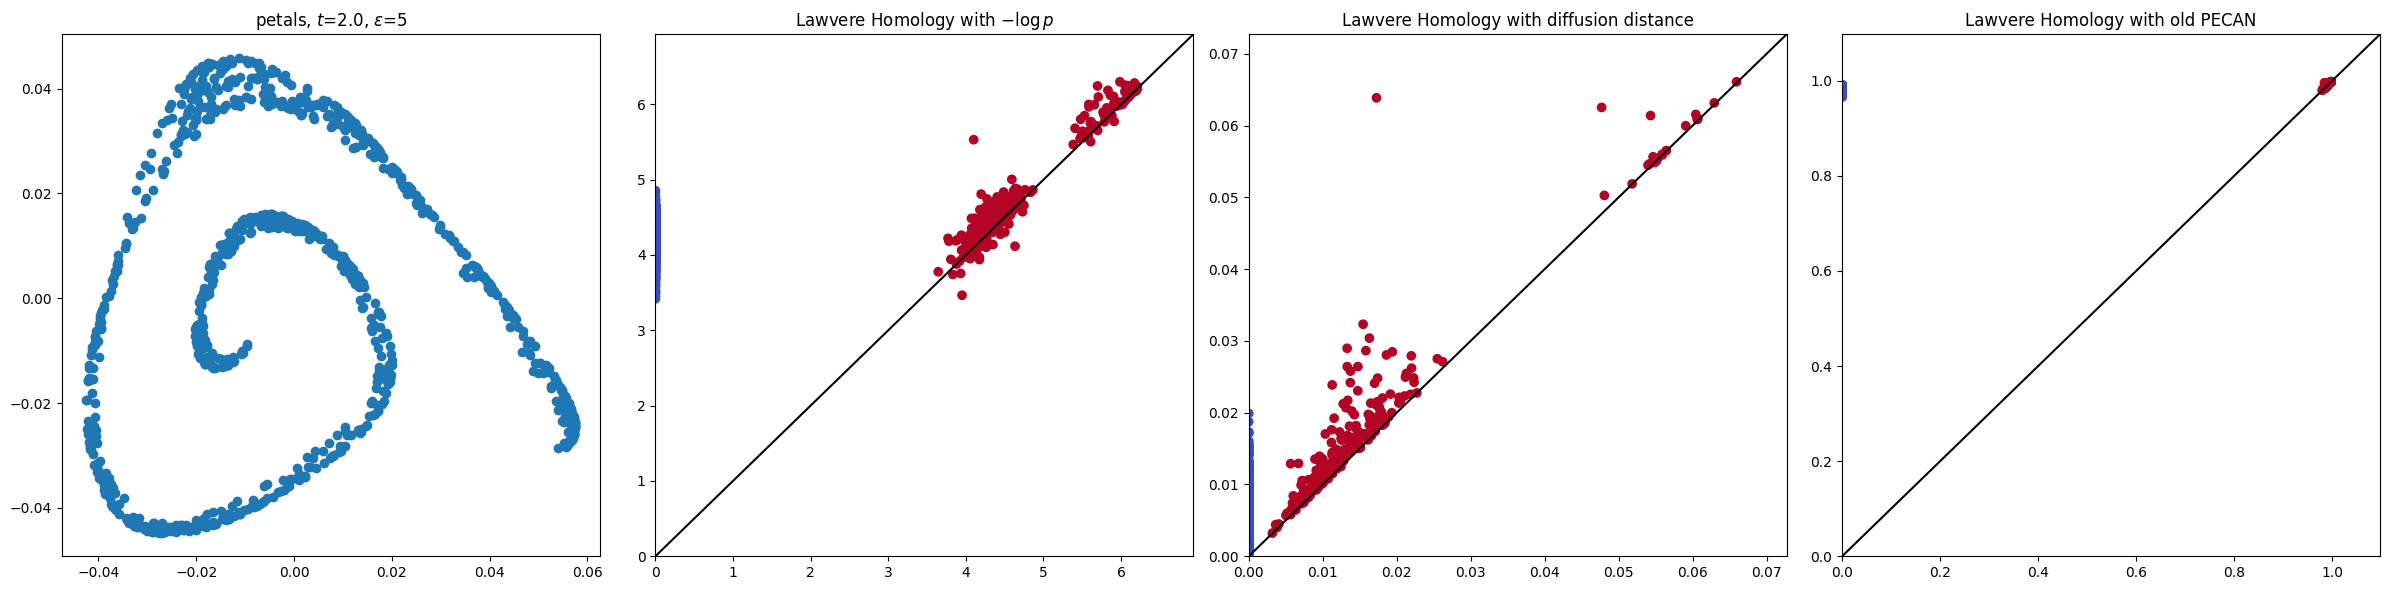

In [13]:
plot_three_dataset(5, swiss_roll_hole)

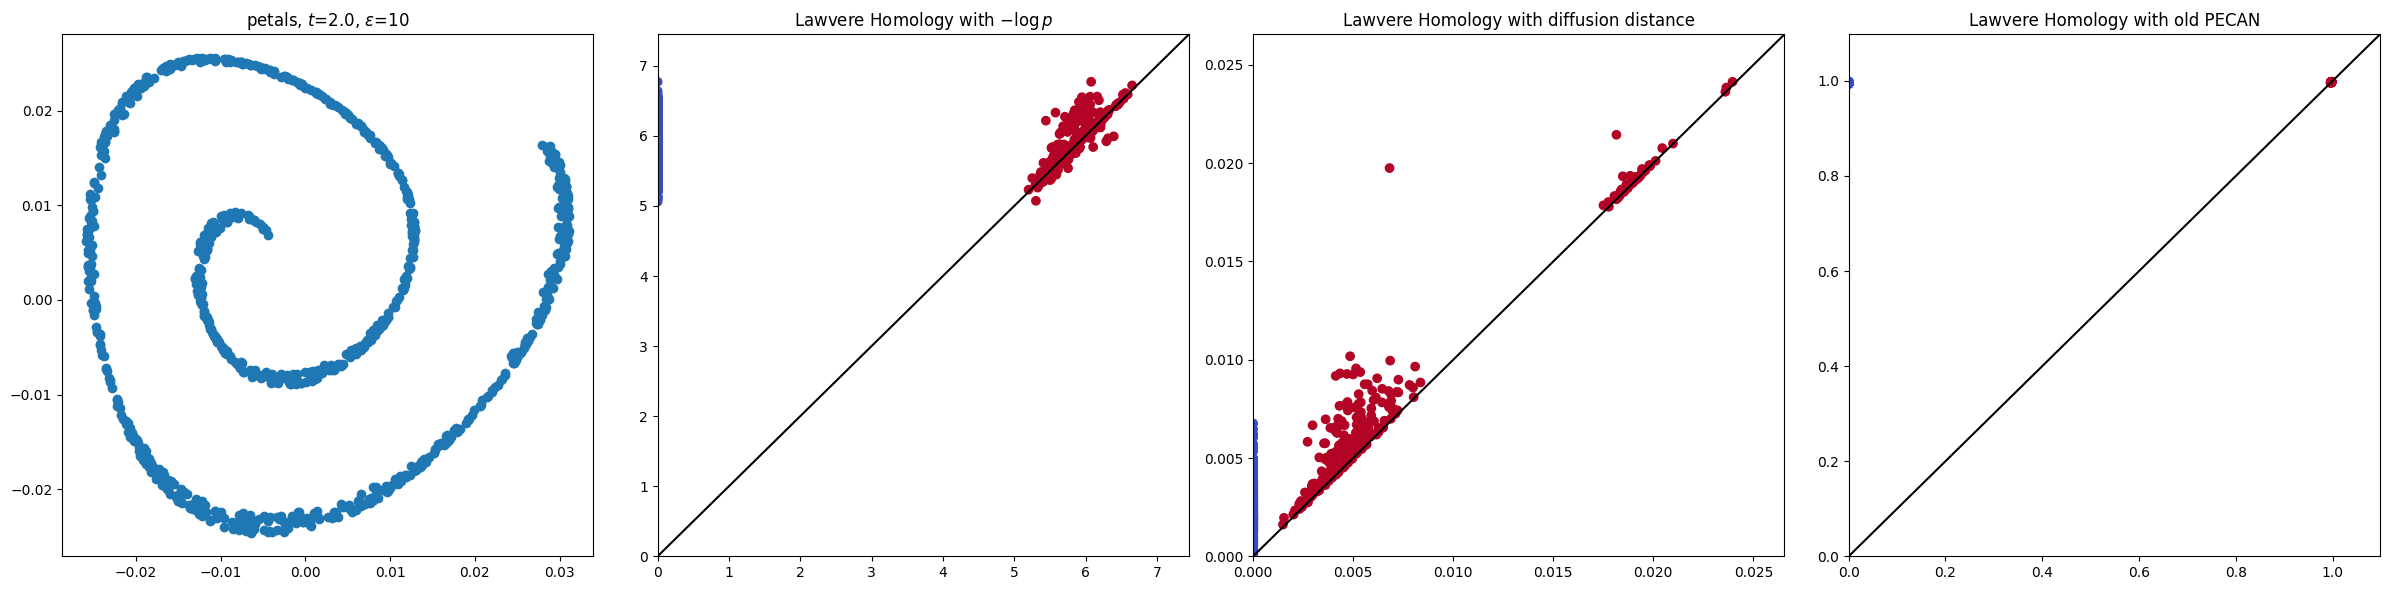

In [15]:
plot_three_dataset(10, swiss_roll_hole)


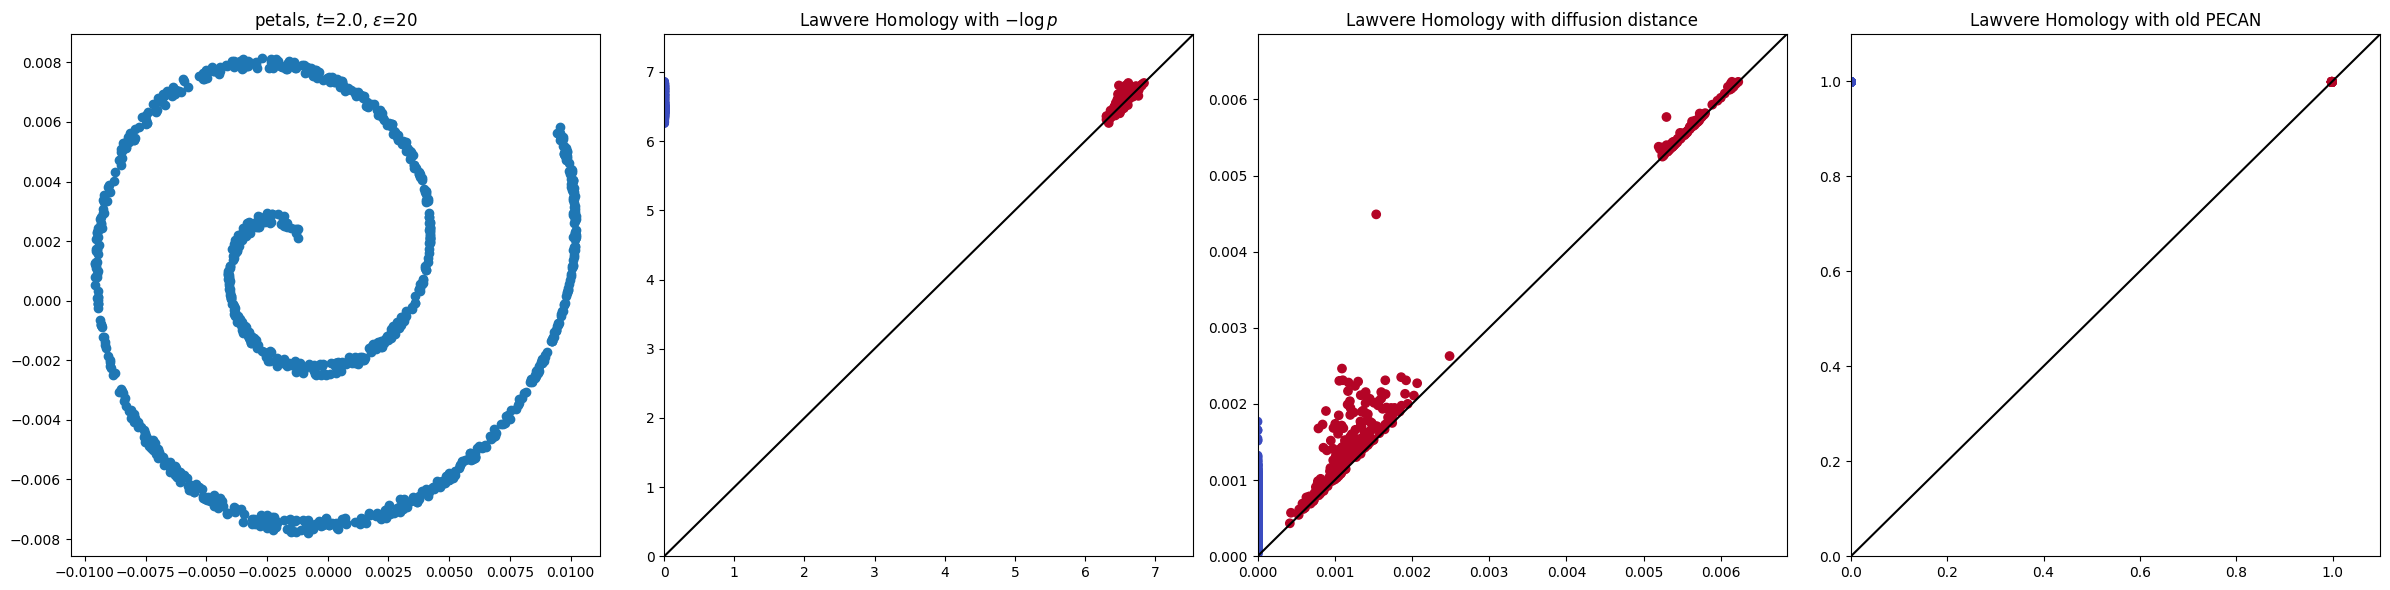

In [16]:
plot_three_dataset(20, swiss_roll_hole)